In [11]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [12]:
data = load_breast_cancer()
X = data.data
y = data.target


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
model = Sequential()

# Input + Hidden layer
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))

# Hidden layer
model.add(Dense(8, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))


H:\spring_people\aiml\venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [17]:
model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1
)


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.5134 - loss: 0.6924 - val_accuracy: 0.6304 - val_loss: 0.6372
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7604 - loss: 0.5900 - val_accuracy: 0.7826 - val_loss: 0.5351
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8900 - loss: 0.4901 - val_accuracy: 0.8913 - val_loss: 0.4371
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9340 - loss: 0.3973 - val_accuracy: 0.9130 - val_loss: 0.3533
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9413 - loss: 0.3202 - val_accuracy: 0.9565 - val_loss: 0.2887
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9413 - loss: 0.2638 - val_accuracy: 0.9348 - val_loss: 0.2434
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9487 - loss: 0.2216 - val_accuracy: 0.9348 - val_loss: 0.2114
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9535 - loss: 0.1895 - val_accuracy: 0.9348 - val_loss

In [18]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9912 - loss: 0.0722 
Test Accuracy: 0.9912280440330505


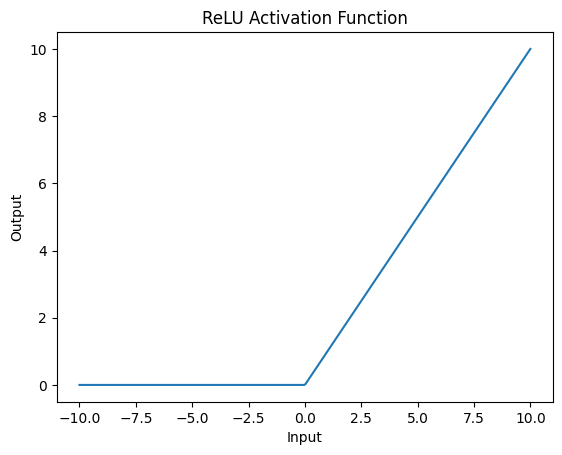

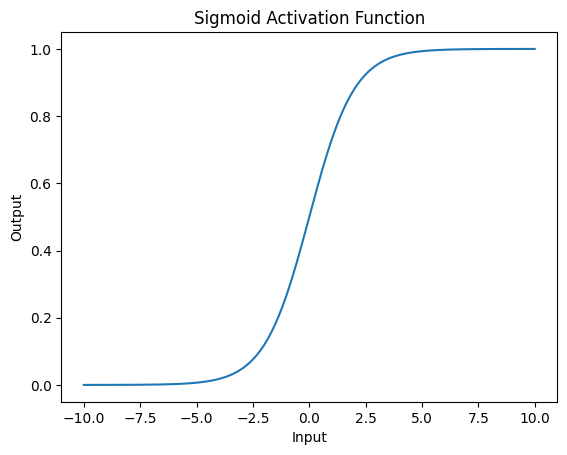

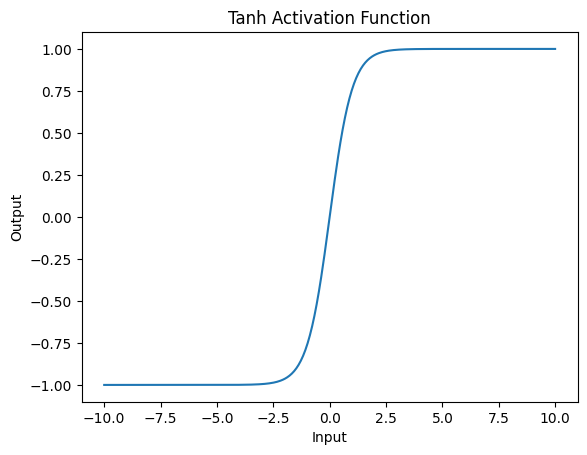

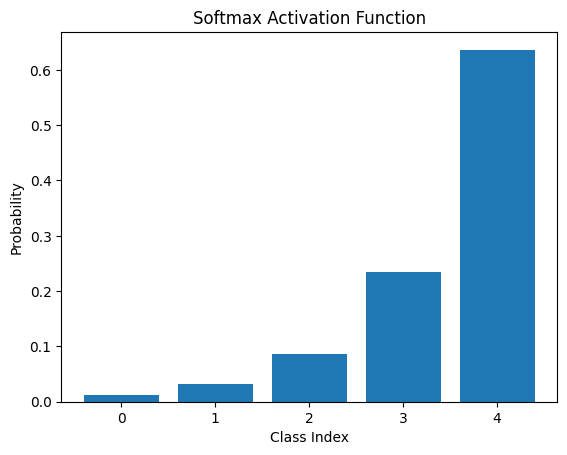

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Input range
x = np.linspace(-10, 10, 400)

# ---------------------------
# ReLU
# ---------------------------
relu = np.maximum(0, x)

plt.figure()
plt.plot(x, relu)
plt.xlabel("Input")
plt.ylabel("Output")
plt.title("ReLU Activation Function")
plt.show()

# ---------------------------
# Sigmoid
# ---------------------------
sigmoid = 1 / (1 + np.exp(-x))

plt.figure()
plt.plot(x, sigmoid)
plt.xlabel("Input")
plt.ylabel("Output")
plt.title("Sigmoid Activation Function")
plt.show()

# ---------------------------
# Tanh
# ---------------------------
tanh = np.tanh(x)

plt.figure()
plt.plot(x, tanh)
plt.xlabel("Input")
plt.ylabel("Output")
plt.title("Tanh Activation Function")
plt.show()

# ---------------------------
# Softmax (example vector)
# ---------------------------
z = np.array([-2, -1, 0, 1, 2])
softmax = np.exp(z) / np.sum(np.exp(z))

plt.figure()
plt.bar(range(len(z)), softmax)
plt.xlabel("Class Index")
plt.ylabel("Probability")
plt.title("Softmax Activation Function")
plt.show()


In [20]:
import numpy as np

# -----------------------------
# 1. Input and Actual Output
# -----------------------------
X = np.array([[2.0]])     # Input
y = np.array([[10.0]])    # Actual output

# -----------------------------
# 2. Initialize Weight & Bias
# -----------------------------
weight = np.array([[3.0]])
bias = np.array([[1.0]])
learning_rate = 0.01

# -----------------------------
# 3. Activation Function
# -----------------------------
def activation(z):
    return z               # Identity activation

def activation_derivative(z):
    return 1

# -----------------------------
# 4. Forward Propagation
# -----------------------------
z = np.dot(X, weight) + bias
y_pred = activation(z)

print("Predicted Output:", y_pred)

# -----------------------------
# 5. Loss Function (MSE)
# -----------------------------
loss = (y_pred - y) ** 2
print("Loss:", loss)

# -----------------------------
# 6. Backpropagation
# -----------------------------
d_loss = 2 * (y_pred - y)
d_z = d_loss * activation_derivative(z)

d_weight = np.dot(X.T, d_z)
d_bias = d_z

# -----------------------------
# 7. Update Parameters
# -----------------------------
weight -= learning_rate * d_weight
bias -= learning_rate * d_bias

print("Updated Weight:", weight)
print("Updated Bias:", bias)


Predicted Output: [[7.]]
Loss: [[9.]]
Updated Weight: [[3.12]]
Updated Bias: [[1.06]]


In [21]:
import numpy as np

# Actual and predicted values
y_true = np.array([10, 20, 30])
y_pred = np.array([12, 18, 25])

# -------------------------
# Mean Squared Error (MSE)
# -------------------------
mse = np.mean((y_true - y_pred) ** 2)
print("Mean Squared Error:", mse)

# -------------------------
# Mean Absolute Error (MAE)
# -------------------------
mae = np.mean(np.abs(y_true - y_pred))
print("Mean Absolute Error:", mae)


Mean Squared Error: 11.0
Mean Absolute Error: 3.0


In [22]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam


In [23]:
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [24]:
model = Sequential()
model.add(Dense(16, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))


H:\spring_people\aiml\venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=0.001),
    metrics=["accuracy"]
)


In [26]:
model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1
)


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5110 - loss: 0.7127 - val_accuracy: 0.6522 - val_loss: 0.6863
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7359 - loss: 0.5803 - val_accuracy: 0.7174 - val_loss: 0.5657
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8484 - loss: 0.4802 - val_accuracy: 0.8261 - val_loss: 0.4639
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8924 - loss: 0.3981 - val_accuracy: 0.8696 - val_loss: 0.3823
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9193 - loss: 0.3294 - val_accuracy: 0.8696 - val_loss: 0.3169
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9364 - loss: 0.2746 - val_accuracy: 0.8913 - val_loss: 0.2686
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9487 - loss: 0.2331 - val_accuracy: 0.9130 - val_loss: 0.2339
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9535 - loss: 0.2009 - val_accuracy: 0.9130 - val_loss

In [27]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9561 - loss: 0.0916 
Test Loss: 0.0916350856423378
Test Accuracy: 0.9561403393745422


In [29]:
model.compile(
    loss="binary_crossentropy",
    optimizer=SGD(learning_rate=0.01),
    metrics=["accuracy"]
)


In [32]:
import numpy as np

# Ensure numeric
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Ensure no NaNs
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)

# Check shapes
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train))


(455, 30)
(455,)
[0. 1.]


In [33]:
model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)


Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_9" is incompatible with the layer: expected axis -1 of input shape to have value 10, but received input with shape (None, 30)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 30), dtype=float32)
  • training=True
  • mask=None
  • kwargs=<class 'inspect._empty'>

In [34]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [35]:
data = load_breast_cancer()
X = data.data
y = data.target


In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [38]:
model = Sequential()

model.add(Dense(16, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))


H:\spring_people\aiml\venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)


In [40]:
model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1
)


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3203 - loss: 0.9088 - val_accuracy: 0.5435 - val_loss: 0.7423
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4939 - loss: 0.7503 - val_accuracy: 0.6957 - val_loss: 0.6280
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6675 - loss: 0.6406 - val_accuracy: 0.7826 - val_loss: 0.5418
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7873 - loss: 0.5538 - val_accuracy: 0.8696 - val_loss: 0.4639
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8606 - loss: 0.4810 - val_accuracy: 0.8913 - val_loss: 0.3969
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9071 - loss: 0.4180 - val_accuracy: 0.8913 - val_loss: 0.3452
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9193 - loss: 0.3650 - val_accuracy: 0.8913 - val_loss: 0.3032
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9218 - loss: 0.3196 - val_accuracy: 0.8913 - val_loss

In [41]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9561 - loss: 0.1064 
Test Accuracy: 0.9561403393745422


In [42]:
predictions = model.predict(X_test[:5])
print(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
[[0.8099034 ]
 [0.00702233]
 [0.13254313]
 [0.9590958 ]
 [0.9896179 ]]


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [44]:
model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1
)


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3790 - loss: 188.0884 - val_accuracy: 0.3043 - val_loss: 129.5380
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3667 - loss: 56.1087 - val_accuracy: 0.6957 - val_loss: 18.1186
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5648 - loss: 22.8858 - val_accuracy: 0.3043 - val_loss: 16.1059
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3765 - loss: 10.5565 - val_accuracy: 0.6739 - val_loss: 5.2282
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4866 - loss: 4.2615 - val_accuracy: 0.2826 - val_loss: 1.6587
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5159 - loss: 1.4664 - val_accuracy: 0.5870 - val_loss: 0.7741
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7139 - loss: 0.7234 - val_accuracy: 0.7609 - val_loss: 0.5714
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8093 - loss: 0.5159 - val_accuracy: 0.7609 -

In [45]:
model.evaluate(X_test, y_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9211 - loss: 0.2155 


[0.21552950143814087, 0.9210526347160339]

In [46]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(64, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))          # Drop 50% neurons
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.3))          # Drop 30% neurons
model.add(Dense(1, activation="sigmoid"))


In [48]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)


In [49]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop]
)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6006 - loss: 56.3808 - val_accuracy: 0.8250 - val_loss: 1.2812
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4358 - loss: 45.9013 - val_accuracy: 0.2750 - val_loss: 22.7888
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4832 - loss: 33.5521 - val_accuracy: 0.2750 - val_loss: 8.4008
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5168 - loss: 28.0819 - val_accuracy: 0.8750 - val_loss: 0.6733
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5168 - loss: 27.4499 - val_accuracy: 0.8500 - val_loss: 1.8095
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5922 - loss: 19.3714 - val_accuracy: 0.9000 - val_loss: 1.0705
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5615 - loss: 16.0944 - val_accuracy: 0.9000 - val_loss: 0.7476
